In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import and Prepare data

In [18]:
data = pd.read_excel('E:/vbak.xlsx')

In [19]:
data.head()

,Date,Value
0,2/7/2019,338948.19
1,2/7/2019,267974.06
2,4/7/2019,392543.78
3,4/7/2019,197866.03
4,4/7/2019,286206.22


In [20]:
data.tail()

,Date,Value
25857,2/4/2020,57847.62
25858,2/4/2020,34040.00
25859,2/4/2020,40430.50
25860,2/10/2019,185333.34
25861,4/11/2019,5088.26


In [21]:
data['Date'] = pd.to_datetime(data['Date'])

In [22]:
data.shape

(25862, 2)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 2 columns):
Date     25862 non-null datetime64[ns]
Value    25862 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 404.2 KB


In [24]:
data['Date'] = data['Date'].apply(lambda x: str(x)[:-12])  
data = data.groupby('Date')['Value'].sum().reset_index()
data.head()

,Date,Value
0,2019-01,5.653039e+08
1,2019-02,6.078914e+08
2,2019-03,6.627751e+08
3,2019-04,1.564008e+09
4,2019-05,1.702860e+09


In [25]:
# data['Sales_diff'] = data['Value'].diff()
data.shape

(24, 2)

In [26]:
data.set_index('Date' , inplace = True)

In [27]:
data.head()

,Value
Date,
2019-01,5.653039e+08
2019-02,6.078914e+08
2019-03,6.627751e+08
2019-04,1.564008e+09
2019-05,1.702860e+09


In [28]:
data.describe()

,Value
count,2.400000e+01
mean,1.037946e+09
std,7.726338e+08
min,1.602296e+08
25%,2.523700e+08
50%,7.972718e+08
75%,1.831873e+09
max,2.076434e+09


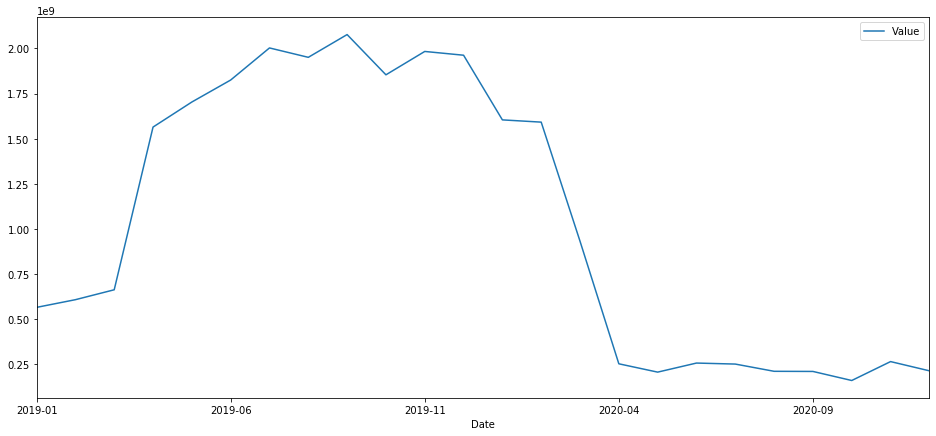

In [29]:
data.plot(figsize = (16 , 7));

## ADF Test

In [31]:
# To check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

In [33]:
test_result = adfuller(data['Value'])

In [34]:
def adf_check(time_series):
    print('\n------Dickey Fuller Test Results---------\n')
    result = adfuller(time_series)
    labels = ['ADF Test Statistic','p values','#Lags used','Number of Observations used']

    for value, label in zip(result, labels):
        print(label + ' : ' + str(value)+'\n')
    
    if result[1] <= 0.05:
        print('Since the evidence is strong enough we reject the null hypothesis so time series is stationary')
    else:
        print('Since the evidence is not enough we fail to reject the null hypothesis, so time series is not stationary')

In [37]:
adf_check(data['Value'])


------Dickey Fuller Test Results---------

ADF Test Statistic : -2.383852368845749

p values : 0.1463459200313018

#Lags used : 9

Number of Observations used : 14

Since the evidence is not enough we fail to reject the null hypothesis, so time series is not stationary


In [39]:
data['Value First Difference'] = data['Value'] - data['Value'].shift(1)

In [40]:
data.head()

,Value,Value First Difference
Date,,
2019-01,5.653039e+08,NaN
2019-02,6.078914e+08,4.258747e+07
2019-03,6.627751e+08,5.488371e+07
2019-04,1.564008e+09,9.012329e+08
2019-05,1.702860e+09,1.388520e+08


In [42]:
adf_check(data['Value First Difference'].dropna())


------Dickey Fuller Test Results---------

ADF Test Statistic : -2.124241452436635

p values : 0.23487936237531537

#Lags used : 9

Number of Observations used : 13

Since the evidence is not enough we fail to reject the null hypothesis, so time series is not stationary


In [43]:
data['Value Second Difference'] = data['Value'] - data['Value'].shift(2)

In [44]:
adf_check(data['Value Second Difference'].dropna())


------Dickey Fuller Test Results---------

ADF Test Statistic : -22.485134291222984

p values : 0.0

#Lags used : 9

Number of Observations used : 12

Since the evidence is strong enough we reject the null hypothesis so time series is stationary


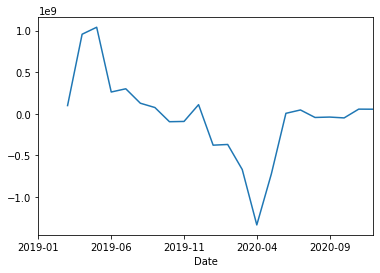

In [46]:
data['Value Second Difference'].plot()

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

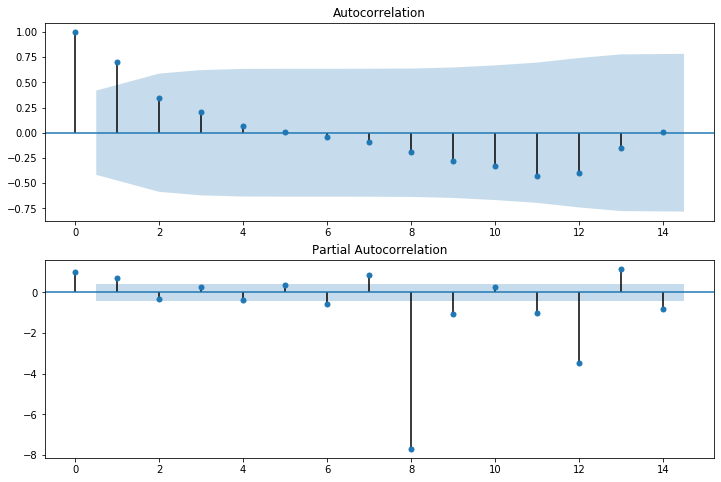

In [52]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
# From acf obtain q value = 1
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Value Second Difference'].iloc[2:],ax=ax1)
# From pacf obtain p value = 2
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Value Second Difference'].iloc[2:],ax=ax2)

## Model - 1(Arima)

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
# Put values in order in order as (p , d , q)
model=ARIMA(data['Value'],order=(2,1,1))
model_fit=model.fit()

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                   23
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -479.900
Method:                       css-mle   S.D. of innovations      278088697.525
Date:                Sat, 12 Jun 2021   AIC                            969.801
Time:                        12:02:06   BIC                            975.478
Sample:                    02-01-2019   HQIC                           971.229
                         - 12-01-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.528e+07   9.68e+07     -0.158      0.876   -2.05e+08    1.75e+08
ar.L1.D.Value     0.5633      0.815      0.692      0.498      -1.033       2.160
ar.L2.D.Value     0.0412      0.326      0.126      0.901      -0.598       0.680
ma.L1.D.Value    -0.3147      0.798     -0.395      0.698      -1.878       1.249
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5903           +0.0000j            1.5903            0.0000
AR.2          -15.2694           +0.0000j           15.2694            0.5000
MA.1            3.1772           +0.0000j            3.1772            0.0000
-----------------------------------------------------------------------------
"""

In [64]:
data['Prediction'] = model_fit.predict(start = 19 , end = 24 , dynamic = True)
print(data['Prediction'])

Date
2019-01   NaN
2019-02   NaN
2019-03   NaN
2019-04   NaN
2019-05   NaN
2019-06   NaN
2019-07   NaN
2019-08   NaN
2019-09   NaN
2019-10   NaN
2019-11   NaN
2019-12   NaN
2020-01   NaN
2020-02   NaN
2020-03   NaN
2020-04   NaN
2020-05   NaN
2020-06   NaN
2020-07   NaN
2020-08   NaN
2020-09   NaN
2020-10   NaN
2020-11   NaN
2020-12   NaN
Name: Prediction, dtype: float64


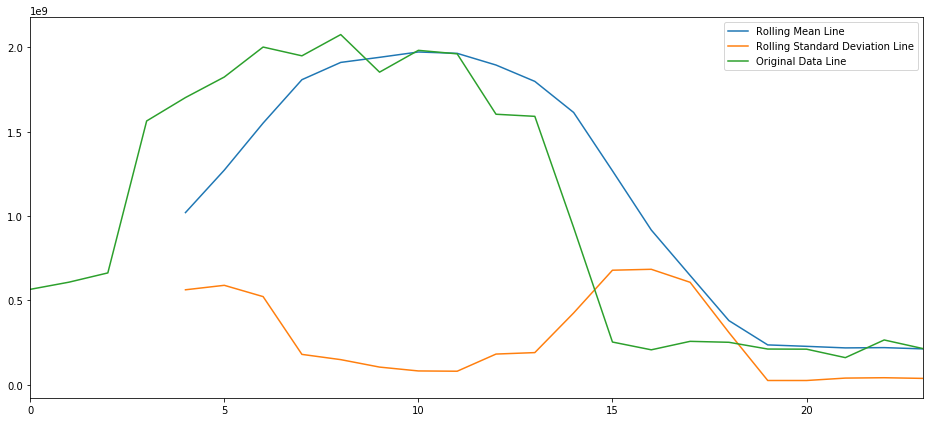

In [12]:
data['Sales'].rolling(5).mean().plot(figsize = (16,7), label = 'Rolling Mean Line')
data['Sales'].rolling(5).std().plot(label = 'Rolling Standard Deviation Line')
data['Sales'].plot(label = 'Original Data Line')
plt.legend()
plt.show()